In [5]:
## importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from pandas import Series
from math import ceil

In [6]:
##Getting inputs from CSV file
df = pd.read_csv('/home/rituraj/Downloads/Project_001/vgsales.csv',keep_default_na=False, sep=',')

DATA EXPLORATION AND ANALYSIS

In [7]:
dfa = df
dfa = dfa.copy()
df[:5]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [9]:
##Integer encoding
##Integer encoding ,Let's take one feature with dtype object and transform into pandas nominal categorical variable.
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [10]:
df['Genre_cat'] = df['Genre'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Rank          16598 non-null  int64   
 1   Name          16598 non-null  object  
 2   Platform      16598 non-null  object  
 3   Year          16598 non-null  object  
 4   Genre         16598 non-null  object  
 5   Publisher     16598 non-null  object  
 6   NA_Sales      16598 non-null  float64 
 7   EU_Sales      16598 non-null  float64 
 8   JP_Sales      16598 non-null  float64 
 9   Other_Sales   16598 non-null  float64 
 10  Global_Sales  16598 non-null  float64 
 11  Genre_cat     16598 non-null  category
dtypes: category(1), float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [12]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_cat
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Sports
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Platform
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Racing
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Sports
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Role-Playing


In [13]:

df['Genre_cat_codes'] = df['Genre_cat'].cat.codes

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Rank             16598 non-null  int64   
 1   Name             16598 non-null  object  
 2   Platform         16598 non-null  object  
 3   Year             16598 non-null  object  
 4   Genre            16598 non-null  object  
 5   Publisher        16598 non-null  object  
 6   NA_Sales         16598 non-null  float64 
 7   EU_Sales         16598 non-null  float64 
 8   JP_Sales         16598 non-null  float64 
 9   Other_Sales      16598 non-null  float64 
 10  Global_Sales     16598 non-null  float64 
 11  Genre_cat        16598 non-null  category
 12  Genre_cat_codes  16598 non-null  int8    
dtypes: category(1), float64(5), int64(1), int8(1), object(5)
memory usage: 1.4+ MB


In [15]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_cat,Genre_cat_codes
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Sports,10
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Platform,4
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Racing,6
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Sports,10
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Role-Playing,7


In [17]:
df['Genre_cat_codes'].value_counts() #gravel has taken zero value due to alphabetical order of classes

0     3316
10    2346
3     1739
7     1488
8     1310
1     1286
6     1249
4      886
9      867
2      848
11     681
5      582
Name: Genre_cat_codes, dtype: int64

In [18]:
df['JP_Sales_cat'] = df['JP_Sales'].astype('category').cat.codes
print("Original values:\n{}\n\nEncoded values:\n{}".format(df['JP_Sales'].value_counts(dropna=False),df['JP_Sales'].value_counts()))

Original values:
0.00    10455
0.02      728
0.01      704
0.03      528
0.04      397
        ...  
1.97        1
1.51        1
1.16        1
2.12        1
6.50        1
Name: JP_Sales, Length: 244, dtype: int64

Encoded values:
0.00    10455
0.02      728
0.01      704
0.03      528
0.04      397
        ...  
1.97        1
1.51        1
1.16        1
2.12        1
6.50        1
Name: JP_Sales, Length: 244, dtype: int64


In [19]:
### Ordinal Values
df['Publisher_nom'] = df['Publisher'].astype('category').cat.codes
df['Publisher'].value_counts(dropna=False)

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Altron                             1
Team17 Software                    1
King Records                       1
Locus                              1
Bohemia Interactive                1
Name: Publisher, Length: 579, dtype: int64

In [20]:
df['Publisher_nom'].value_counts()

138    1351
21      975
348     932
526     921
275     832
       ... 
553       1
499       1
74        1
451       1
551       1
Name: Publisher_nom, Length: 579, dtype: int64

In [23]:
#Using LabelEncoder , it is efficient tool for encoding the levels of categorical features into numeric values. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Publisher_ord']= label_encoder.fit_transform(df['Publisher']) 
  
df['Publisher_ord'].unique()

array([360, 323, 495, 457,  21, 526,  66, 138, 447, 467,  53,   6,  85,
       177, 275, 459, 466, 288, 543, 550, 530, 137, 427, 546, 144, 348,
       386, 214, 489, 164,  17, 292, 126, 342, 296,  91, 425, 281,  40,
       325, 253, 120,  10, 344, 523, 392, 308, 237, 501, 535,  13, 330,
       241, 531, 464, 534,  23,  63, 109, 379, 426, 540, 219, 198, 199,
       553, 206, 101, 224,  94, 431,  55, 487,  12, 568,  18, 461,   4,
       420, 349, 160,  30,  71, 462, 303, 373, 567, 414,  88, 142, 474,
        97, 435, 492,  27, 176, 322, 401, 452, 513, 442, 273, 182, 510,
       299, 191, 334, 399,  84, 497, 104, 437, 415, 577, 421, 527, 444,
       246, 341,  87, 465,   2,  58, 223, 368, 314, 366,  67, 515, 463,
       256, 363, 277, 416, 233, 508, 170, 433, 318, 305, 227, 434, 458,
       529, 193, 555,  61, 382, 517, 279, 232, 493, 263, 122, 146, 560,
       238, 483,  83,  44, 186, 324, 255,  36, 556,  22, 384, 423, 559,
       528, 184, 547, 369, 503, 148,  60, 272, 304, 505, 213, 13

In [24]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Altron                             1
Team17 Software                    1
King Records                       1
Locus                              1
Bohemia Interactive                1
Name: Publisher, Length: 579, dtype: int64

In [25]:
#using one hot encoder
pd.get_dummies(df['Publisher'])
#same set of dummy variables can be created using OneHotEncoder from sklearn.
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
X = enc.fit_transform(df['Publisher'][:,np.newaxis])
enc.fit(df['Publisher'][:,np.newaxis]).categories_

[array(['10TACLE Studios', '1C Company', '20th Century Fox Video Games',
        '2D Boy', '3DO', '49Games', '505 Games', '5pb', '7G//AMES',
        '989 Sports', '989 Studios', 'AQ Interactive', 'ASC Games',
        'ASCII Entertainment', 'ASCII Media Works', 'ASK', 'Abylight',
        'Acclaim Entertainment', 'Accolade', 'Ackkstudios', 'Acquire',
        'Activision', 'Activision Blizzard', 'Activision Value',
        'Adeline Software', 'Aerosoft', 'Agatsuma Entertainment', 'Agetec',
        'Aksys Games', 'Alawar Entertainment', 'Alchemist',
        'Alternative Software', 'Altron', 'Alvion', 'American Softworks',
        'Angel Studios', 'Answer Software', 'Aqua Plus', 'Aques',
        'Arc System Works', 'Arena Entertainment', 'Aria', 'Arika',
        'ArtDink', 'Aruze Corp', 'Ascaron Entertainment',
        'Ascaron Entertainment GmbH', 'Asgard', 'Asmik Ace Entertainment',
        'Asmik Corp', 'Aspyr', 'Astragon', 'Asylum Entertainment', 'Atari',
        'Athena', 'Atlus', 'Ava

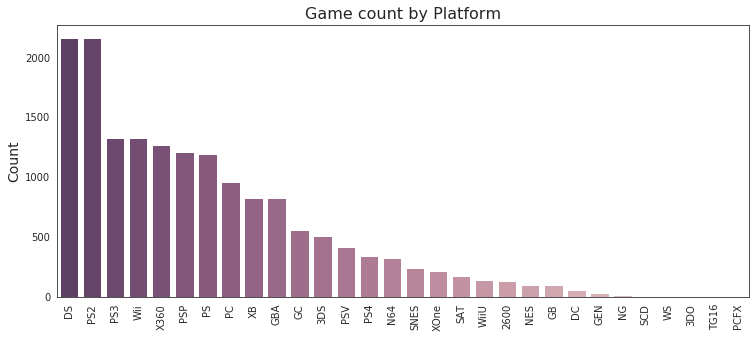

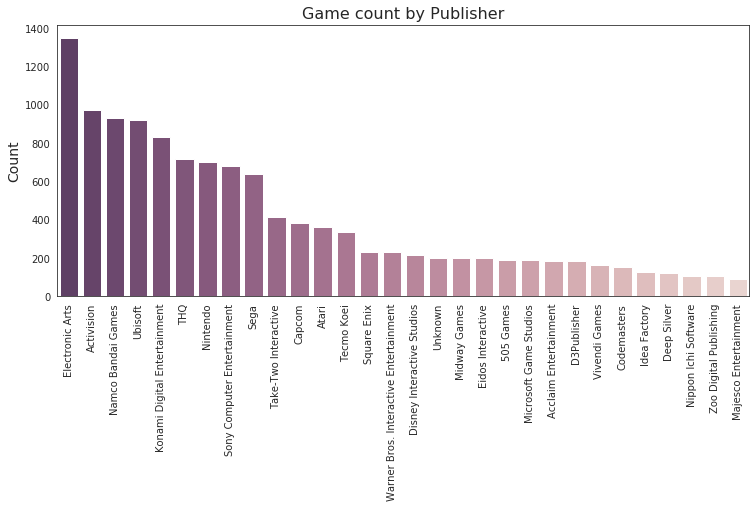

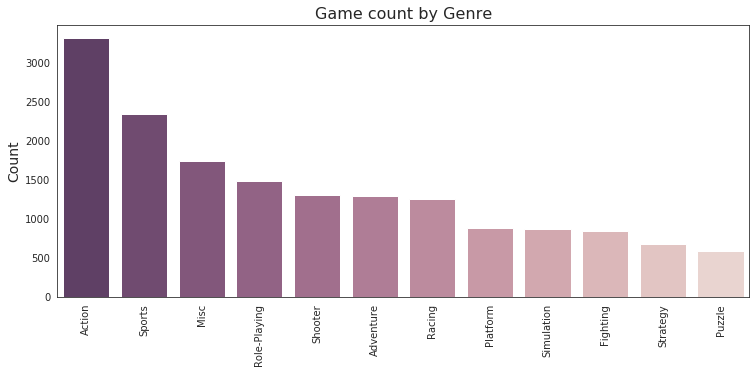

In [26]:
##Plotting categorical features
cols = ['Platform','Publisher', 'Genre']

for col in cols:
    chart = df[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')

In [27]:
df_data_1 = pd.read_csv('/home/rituraj/Downloads/vgsales1.csv',keep_default_na=False, sep=',')
df_data_1.head()
df_game = df_data_1[['Name', 'Year', 'Genre']]

df_game.head(10)
df_game = df_game.dropna()

df_game.reset_index(inplace = True)
df_game.drop("index", axis = 1, inplace = True)
df_game.shape
df_game.head()


,Name,Year,Genre
0,Wii Sports,2006.0,Sports
1,Super Mario Bros.,1985.0,Platform
2,Mario Kart Wii,2008.0,Racing
3,PlayerUnknown's Battlegrounds,2017.0,Shooter
4,Wii Sports Resort,2009.0,Sports


In [28]:
df.corr()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_cat_codes,JP_Sales_cat,Publisher_nom,Publisher_ord
Rank,1.000000,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407,-0.053018,-0.317237,-0.018706,-0.018706
NA_Sales,-0.401362,1.000000,0.767727,0.449787,0.634737,0.941047,0.017435,0.369554,0.002891,0.002891
EU_Sales,-0.379123,0.767727,1.000000,0.435584,0.726385,0.902836,0.016481,0.363845,0.011400,0.011400
JP_Sales,-0.267785,0.449787,0.435584,1.000000,0.290186,0.611816,0.030085,0.936522,0.051135,0.051135
Other_Sales,-0.332986,0.634737,0.726385,0.290186,1.000000,0.748331,0.009731,0.262010,0.012898,0.012898
Global_Sales,-0.427407,0.941047,0.902836,0.611816,0.748331,1.000000,0.021671,0.530316,0.016892,0.016892
Genre_cat_codes,-0.053018,0.017435,0.016481,0.030085,0.009731,0.021671,1.000000,0.032586,-0.051350,-0.051350
JP_Sales_cat,-0.317237,0.369554,0.363845,0.936522,0.262010,0.530316,0.032586,1.000000,0.063871,0.063871
Publisher_nom,-0.018706,0.002891,0.011400,0.051135,0.012898,0.016892,-0.051350,0.063871,1.000000,1.000000
Publisher_ord,-0.018706,0.002891,0.011400,0.051135,0.012898,0.016892,-0.051350,0.063871,1.000000,1.000000


In [29]:
df_game1 = df_game.groupby("Year").sum()
df_game1.head()

,Name,Genre
Year,,
,Tour de France 2011The History Channel: Great ...,SportsStrategyAdventureShooterActionActionMisc...
1970.0,TERADanganronpa: Trigger Happy HavocGhostbuste...,Role-PlayingAdventureActionRole-PlayingMiscRac...
1973.0,Trek73,Simulation
1975.0,Nintengirls: College Girl & Friends,Simulation
1977.0,CombatAir-Sea BattleIndy 500Basic MathBlackjac...,ActionShooterRacingMiscMiscActionAdventureSpor...


In [30]:
from sklearn import linear_model
line = linear_model.LinearRegression()

In [31]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 

game = pd.read_csv('vgsales.csv', sep=',', encoding='utf-8')
game.head(30)
X = game.iloc[:, 6:11].values  
y = game.iloc[:, 2].values 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 



from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  



from sklearn.datasets import load_breast_cancer

#load data
cancer = load_breast_cancer()
#create dataframes from np arrays of cancer Bunch objects
y = pd.DataFrame(cancer.target,columns=['target'])
X = pd.DataFrame(cancer.data,columns=cancer.feature_names)
#concatenate dataframes along columns
df = pd.concat([X,y],axis=1)
#change malignant cancer being the positive class
df['target'].replace([0,1],[1,0],inplace=True)
df['target'].value_counts() #check replacement

0    357
1    212
Name: target, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

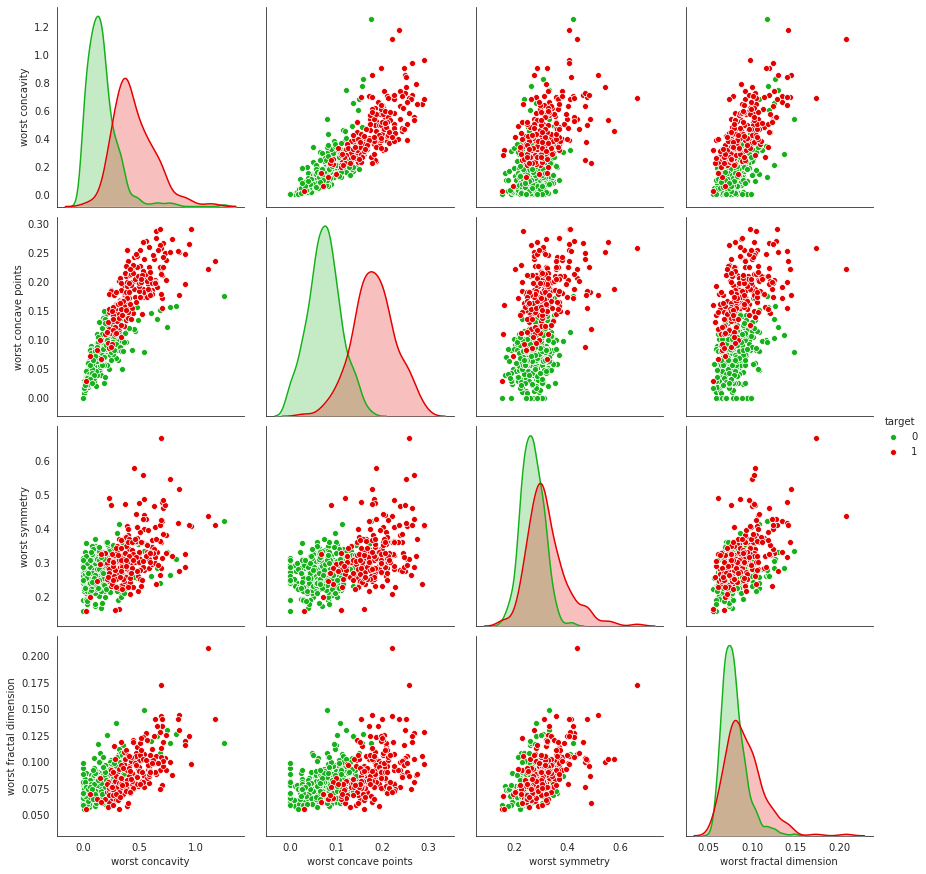

In [33]:
sns.pairplot(df.loc[:,'worst concavity':'target'],hue="target",palette=sns.xkcd_palette(['green','red']), height=3)

In [35]:
#Impute the values using scikit-learn SimpleImpute Class

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_train)
imputed_train_df = imp_mean.transform(X_train)
print(imputed_train_df)

[[ 0.52410503  0.13358201 -0.2472117  -0.14269024  0.25316435]
 [-0.26614598 -0.24377729 -0.2472117  -0.24250274 -0.29746358]
 [-0.23128196 -0.16830543 -0.02846948 -0.19259649 -0.19957417]
 ...
 [ 0.36140629  0.680753    5.78382363  0.45618479  1.60526184]
 [-0.31263133 -0.28151322 -0.18471392 -0.24250274 -0.32193594]
 [-0.12668992 -0.09283357 -0.2472117  -0.14269024 -0.15674756]]


In [36]:
###Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() #default solver 'lbfgs', L2 penalty, C=1

In [37]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() #zero-mean, unit variance normalization     
X_scaled = std_scaler.fit_transform(X)

In [38]:
#flatten the target vector for cv
y = y.values.ravel()
clf.fit(X_scaled,y) #fit the Logistic Model on our dataset
clf.score(X_scaled,y) #accurcy score for training dataset

0.9876977152899824

In [39]:
from sklearn.model_selection import cross_val_score
sc = cross_val_score(clf, X_scaled, y, cv=5) #default stratified 5-fold cross-validation
print("Mean cv accuracy score (logit, L2, C=1): {:.4f}".format(np.mean(sc)))

Mean cv accuracy score (logit, L2, C=1): 0.9807


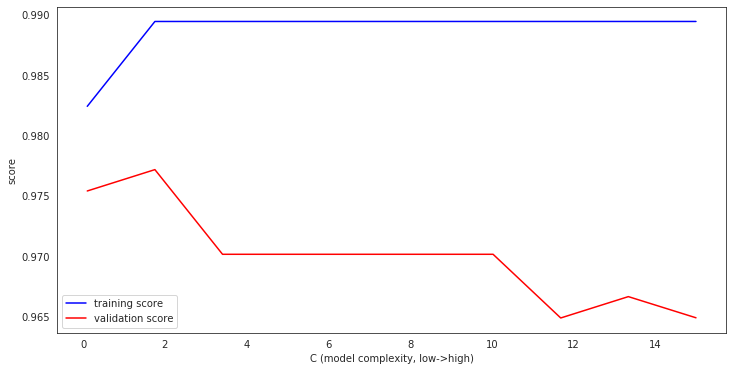

In [41]:
from sklearn.model_selection import validation_curve
c_vals = np.linspace(0.1,15,10) #regularization parameter values
train_scores, valid_scores = validation_curve(clf, X_scaled, y,"C",c_vals,cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.figure(figsize=[12,6])
plt.plot(c_vals, train_scores_mean, color='blue', label='training score')
plt.plot(c_vals, valid_scores_mean, color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('C (model complexity, low->high)')
plt.ylabel('score');

In [42]:
clf = LogisticRegression(C=1.8)
clf.fit(X_scaled,y) #fit the Logistic Model on our dataset
clf.score(X_scaled,y) #accurcy score for training dataset

0.9876977152899824

In [43]:
sc = cross_val_score(clf, X_scaled, y, cv=5) #default stratified 5-fold cross-validation
print("Mean cv accuracy score (logit, L2, C=1.8): {:.4f}".format(np.mean(sc)))

Mean cv accuracy score (logit, L2, C=1.8): 0.9772


In [44]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  


y_pred = classifier.predict(X_test)  

In [45]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 24   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0  10   3  38   1   5   0   0   0   1   0   6   4  10   1   2   5
    0   0   2   0   8   4   5   0   2]
 [  0   0   2   0   3   0   0   1   0   0   0   0   0   0   0   0   0   1
    0   0   1   0   0   0   0   0   0]
 [  2   0  16   7 227   0   6   3   0   2   0   0  16   4  18   5   1  20
    0   0   2   0  51   0  26   7   4]
 [  0   0   3   0   2   0   3   2   0   2   4   0   0   0   3   0   0   1
    0   0   2   0   0   0   0   1   0]
 [  0   0   3   0  10   3 127   5   0   2   1   0   0   3   2   0   0   1
    0   0   0   0   0   0   0  17   0]
 [  0   0   2   1   4   2   9  58   0   5   0   0   0   1   0   0   0   1
    0   0   0   0   0   0   0  32   0]
 [  0   0   2   1   2   1   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0 

/home/rituraj/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:

error = []


for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))



Text(0, 0.5, 'Global_sales')

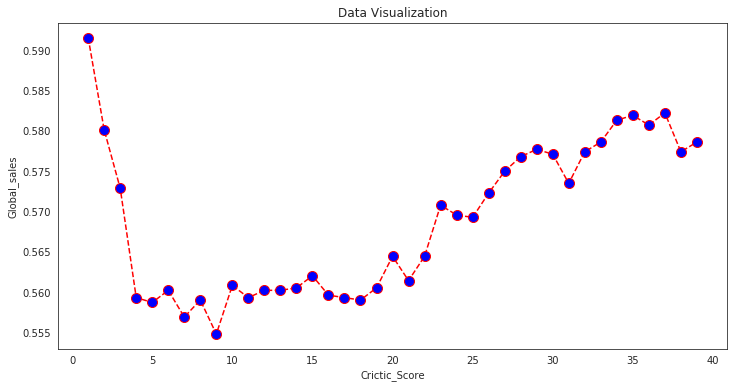

In [47]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Data Visualization')  
plt.xlabel('Crictic_Score')  
plt.ylabel('Global_sales')  

In [48]:
## Importing Data Visualization packages
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

In [49]:
df_game_ = df_game.groupby("Genre").sum()
df_game_.head()

,Name,Year
Genre,,
Action,Grand Theft Auto VGrand Theft Auto VGrand Thef...,2013.02014.02004.02002.02013.02001.02015.02008...
Action-Adventure,Red Dead Redemption 2The Legend of Zelda: Brea...,2018.02017.02018.02018.02012.02013.02018.02011...
Adventure,The Legend of Zelda: Ocarina of TimeThe Legend...,1998.02006.01987.01995.02013.01997.02007.01992...
Board Game,Monopoly for Nintendo SwitchBillion RoadCarcas...,2017.02018.02018.02019.02017.02019.02018.02018...
Education,It's Spring AgainInfluentBrain Age: Concentrat...,2007.02014.02013.01994.02001.01995.01994.01996...


In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X,y)
gnb.score(X,y)

0.9420035149384886

In [51]:
sc = cross_val_score(gnb, X, y, cv=5)
print("Mean cv accuracy score (GaussianNB): {:.4f}".format(np.mean(sc)))

Mean cv accuracy score (GaussianNB): 0.9385


In [52]:
#quantile binning for one feature
pd.qcut(df['mean radius'], 5, labels=list(range(5)))

0      4
1      4
2      4
3      1
4      4
      ..
564    4
565    4
566    3
567    4
568    0
Name: mean radius, Length: 569, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [53]:
#apply for all features
df_q = pd.DataFrame()
for col in df.loc[:,'mean radius':'worst fractal dimension']:
    df_q[col] = pd.qcut(df[col], 5, labels=list(range(5)))

In [54]:
df_q=pd.concat([df.target,df_q],axis=1)
df_q.head()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,4,0,4,4,4,4,4,4,4,...,4,0,4,4,4,4,4,4,4,4
1,1,4,1,4,4,1,1,3,3,2,...,4,1,4,4,1,2,2,4,2,3
2,1,4,3,4,4,4,4,4,4,4,...,4,2,4,4,3,4,4,4,4,3
3,1,1,3,1,0,4,4,4,4,4,...,2,2,2,1,4,4,4,4,4,4
4,1,4,0,4,4,3,3,4,4,2,...,4,0,4,4,2,2,3,3,0,1


In [55]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(X,y)
gnb.score(X,y)

0.8963093145869947

In [56]:
sc = cross_val_score(gnb, X, y, cv=5)
print("Mean cv accuracy score (MultinomialNB): {:.4f}".format(np.mean(sc)))

Mean cv accuracy score (MultinomialNB): 0.8963


In [57]:
#load multi-class Iris plants classification dataset
from sklearn.datasets import load_iris
md = load_iris()
print(md.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [58]:
clf = LogisticRegression(multi_class='ovr',solver='liblinear').fit(md.data,md.target) #force binary classifier
clf.coef_.shape

(3, 4)

In [59]:
sc = cross_val_score(clf, md.data, md.target, cv=5)
print("Mean cv accuracy score (one-vs.-rest, LogisticRegression): {:.2f}".format(np.mean(sc)))

Mean cv accuracy score (one-vs.-rest, LogisticRegression): 0.96


In [60]:
clf = LogisticRegression(multi_class='multinomial',solver='newton-cg').fit(md.data,md.target)
clf.coef_.shape

(3, 4)

In [61]:
sc = cross_val_score(clf, md.data, md.target, cv=5)
print("Mean cv accuracy score (Multinomial LogisticRegression): {:.2f}".format(np.mean(sc)))

Mean cv accuracy score (Multinomial LogisticRegression): 0.97


In [62]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(md.data,md.target)
kn.score(md.data,md.target)

0.96

In [63]:
kn.classes_

array([0, 1, 2])

In [64]:
sc = cross_val_score(clf, md.data, md.target, cv=5)
print("Mean cv accuracy score (kNN=3,multi-class): {:.2f}".format(np.mean(sc)))

Mean cv accuracy score (kNN=3,multi-class): 0.97


In [65]:
from sklearn.multiclass import OneVsRestClassifier
nb = OneVsRestClassifier(GaussianNB())
nb.fit(md.data,md.target)
nb.score(md.data,md.target)

0.94

In [66]:
nb.classes_,nb.estimators_

(array([0, 1, 2]),
 [GaussianNB(priors=None, var_smoothing=1e-09),
  GaussianNB(priors=None, var_smoothing=1e-09),
  GaussianNB(priors=None, var_smoothing=1e-09)])

In [67]:
sc = cross_val_score(nb, md.data, md.target, cv=5)
print("Mean cv accuracy score (GaussianNB,multi-class): {:.2f}".format(np.mean(sc)))

Mean cv accuracy score (GaussianNB,multi-class): 0.94


In [70]:
cc = pd.read_csv('/home/rituraj/Downloads/Project_001/vgsales.csv')

In [71]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [72]:
for col in cc.columns:
    if(cc[col].dtype == 'object'):
        cc[col]= cc[col].astype('category') #transform object data type to categorical
        cc[col] = cc[col].cat.codes #assign numeric codes for each category within column

In [73]:
cc.Global_Sales.value_counts() #imbalanced dataset

0.02     1071
0.03      811
0.04      645
0.05      632
0.01      618
         ... 
9.09        1
12.27       1
16.38       1
20.22       1
22.00       1
Name: Global_Sales, Length: 623, dtype: int64

In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm

In [75]:
from pandas import get_dummies
df_copy = pd.get_dummies(df)

In [76]:
df[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [77]:
df3 = df_copy
y = df3['target'].values
df3 = df3.drop(['target'],axis=1)
X = df3.values

In [78]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50, random_state=2)

In [79]:
radm = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)
y_val_1 = radm.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_1).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.9473684210526315


In [80]:
log_reg = LogisticRegression().fit(Xtrain, ytrain)
y_val_2 = log_reg.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_2).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.9263157894736842


/home/rituraj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [81]:
all_predictions = log_reg.predict(Xtest)
print(classification_report(ytest, all_predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       175
           1       0.92      0.88      0.90       110

    accuracy                           0.93       285
   macro avg       0.93      0.92      0.92       285
weighted avg       0.93      0.93      0.93       285



Text(0.5, 1, 'Training Set Confusion Matrix')

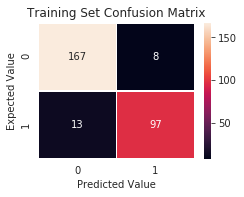

In [82]:
fig, ax = plt.subplots(figsize=(3.5,2.5))
sns.heatmap(confusion_matrix(ytest, all_predictions), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Set Confusion Matrix')

In [83]:
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking (top 10):')

for f in range(10):
    print('%d. feature %d %s (%f)' % (f+1, indices[f], df3.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

Feature ranking (top 10):
1. feature 20 worst radius (0.173742)
2. feature 23 worst area (0.121224)
3. feature 27 worst concave points (0.111620)
4. feature 7 mean concave points (0.100377)
5. feature 22 worst perimeter (0.075150)
6. feature 13 area error (0.057373)
7. feature 3 mean area (0.056657)
8. feature 0 mean radius (0.048019)
9. feature 6 mean concavity (0.036336)
10. feature 2 mean perimeter (0.032751)
